<a href="https://colab.research.google.com/github/marimellop/demo-rasa/blob/main/Prova_Final_Q1_Mariana_Mello_Pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

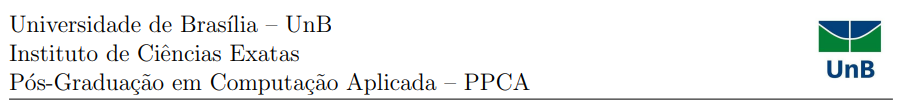

# Prova Final de Análise Estatística de Dados e Informações

Disciplina: Análise Estatística de Dados e Informações

Discente: Mariana Mello Pereira

E-mail: 252107019@aluno.unb.br

Data: 23/11/2025

In [1]:
#Instalação de biblioteca
%pip install bioinfokit

#Importação de todas as Bibliotecas já utilizadas
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
import seaborn as sns
import itertools
import io
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy import stats
from scipy import optimize
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from bioinfokit.analys import stat
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from wordcloud import WordCloud
from IPython.display import display
import geopandas as gpd
import yfinance as yf
import random

import inspect, sys, types

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=c134fe617b7d968e88bf9d6b02fb77ed404b0a104ad4b49bc62f2b7d7c815f68
  Stored in directory: /root/.cache/pip/wheels/b4/76/43/7fa2c349dac62f041fe8d85c9f48e47ca25fc39fd79d0b5f5e
Successfully built bioinfokit


> Questão 1

Esta questão aborda a aplicação prática de um problema de Ciência de Dados utilizando Regressão Linear. O objetivo é prever preços de imóveis com base em dados reais da região de King County, nos Estados Unidos.

A base de dados utilizada é a Previsão de Vendas de Imóveis em King County (EUA).Os dados incluem casas vendidas na região entre maio de 2014 e maio de 2015. A base de dados inclue características dos imóveis como número de quartos, número de banheiros, área útil do terreno, qunatidade de andares, vista para o mar, ano da construção, entre outras.

In [2]:
#Leitura da Base de Dados
data = pd.read_csv('/content/drive/MyDrive/Tarefa_AEDI/kc_house_data.csv')
data = data.dropna()
print(data.shape) #quantidade de linhas e colunas
print(list(data.columns)) #lista das colunas

(21613, 21)
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [3]:
#Visualização dos dados
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287




> 1. Análise Descritiva dos Dados


Em um primeiro momento serão analisados os dados através de uma análise exploratória para identificar possíveis correlações das variáveis com o preço de venda do imóvel e apoiar na escolha daquelas adequadas para o estudo de correlação.

In [4]:
#Informação sobre os dados
data.info() #busca verificar se há valores faltantes e o tipo de dado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Contagem única de cada variável
data.nunique()

,0
id,21436
date,372
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [6]:
#Descrição dos dados
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Analisando os valores da descrição de dados, observa-se que a latitude e longitude não possui variação dentre os quartis, se mostrando um dado constante que não irá agregar para explicação da variável dependente.

Também observa-se que o CEP tem uma pequena varição, se tornando quase constante, consideradando também que não irá agregar para a explicação da variável dependente.

Também será retirado o ID (identificador único) de cada imóvel das próximas análises.

In [7]:
#Retirada de Colunas Específicas do Imóvel
columns_to_drop = ['id', 'zipcode', 'lat','long']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)
print(list(data.columns)) #lista das colunas atualizada

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']


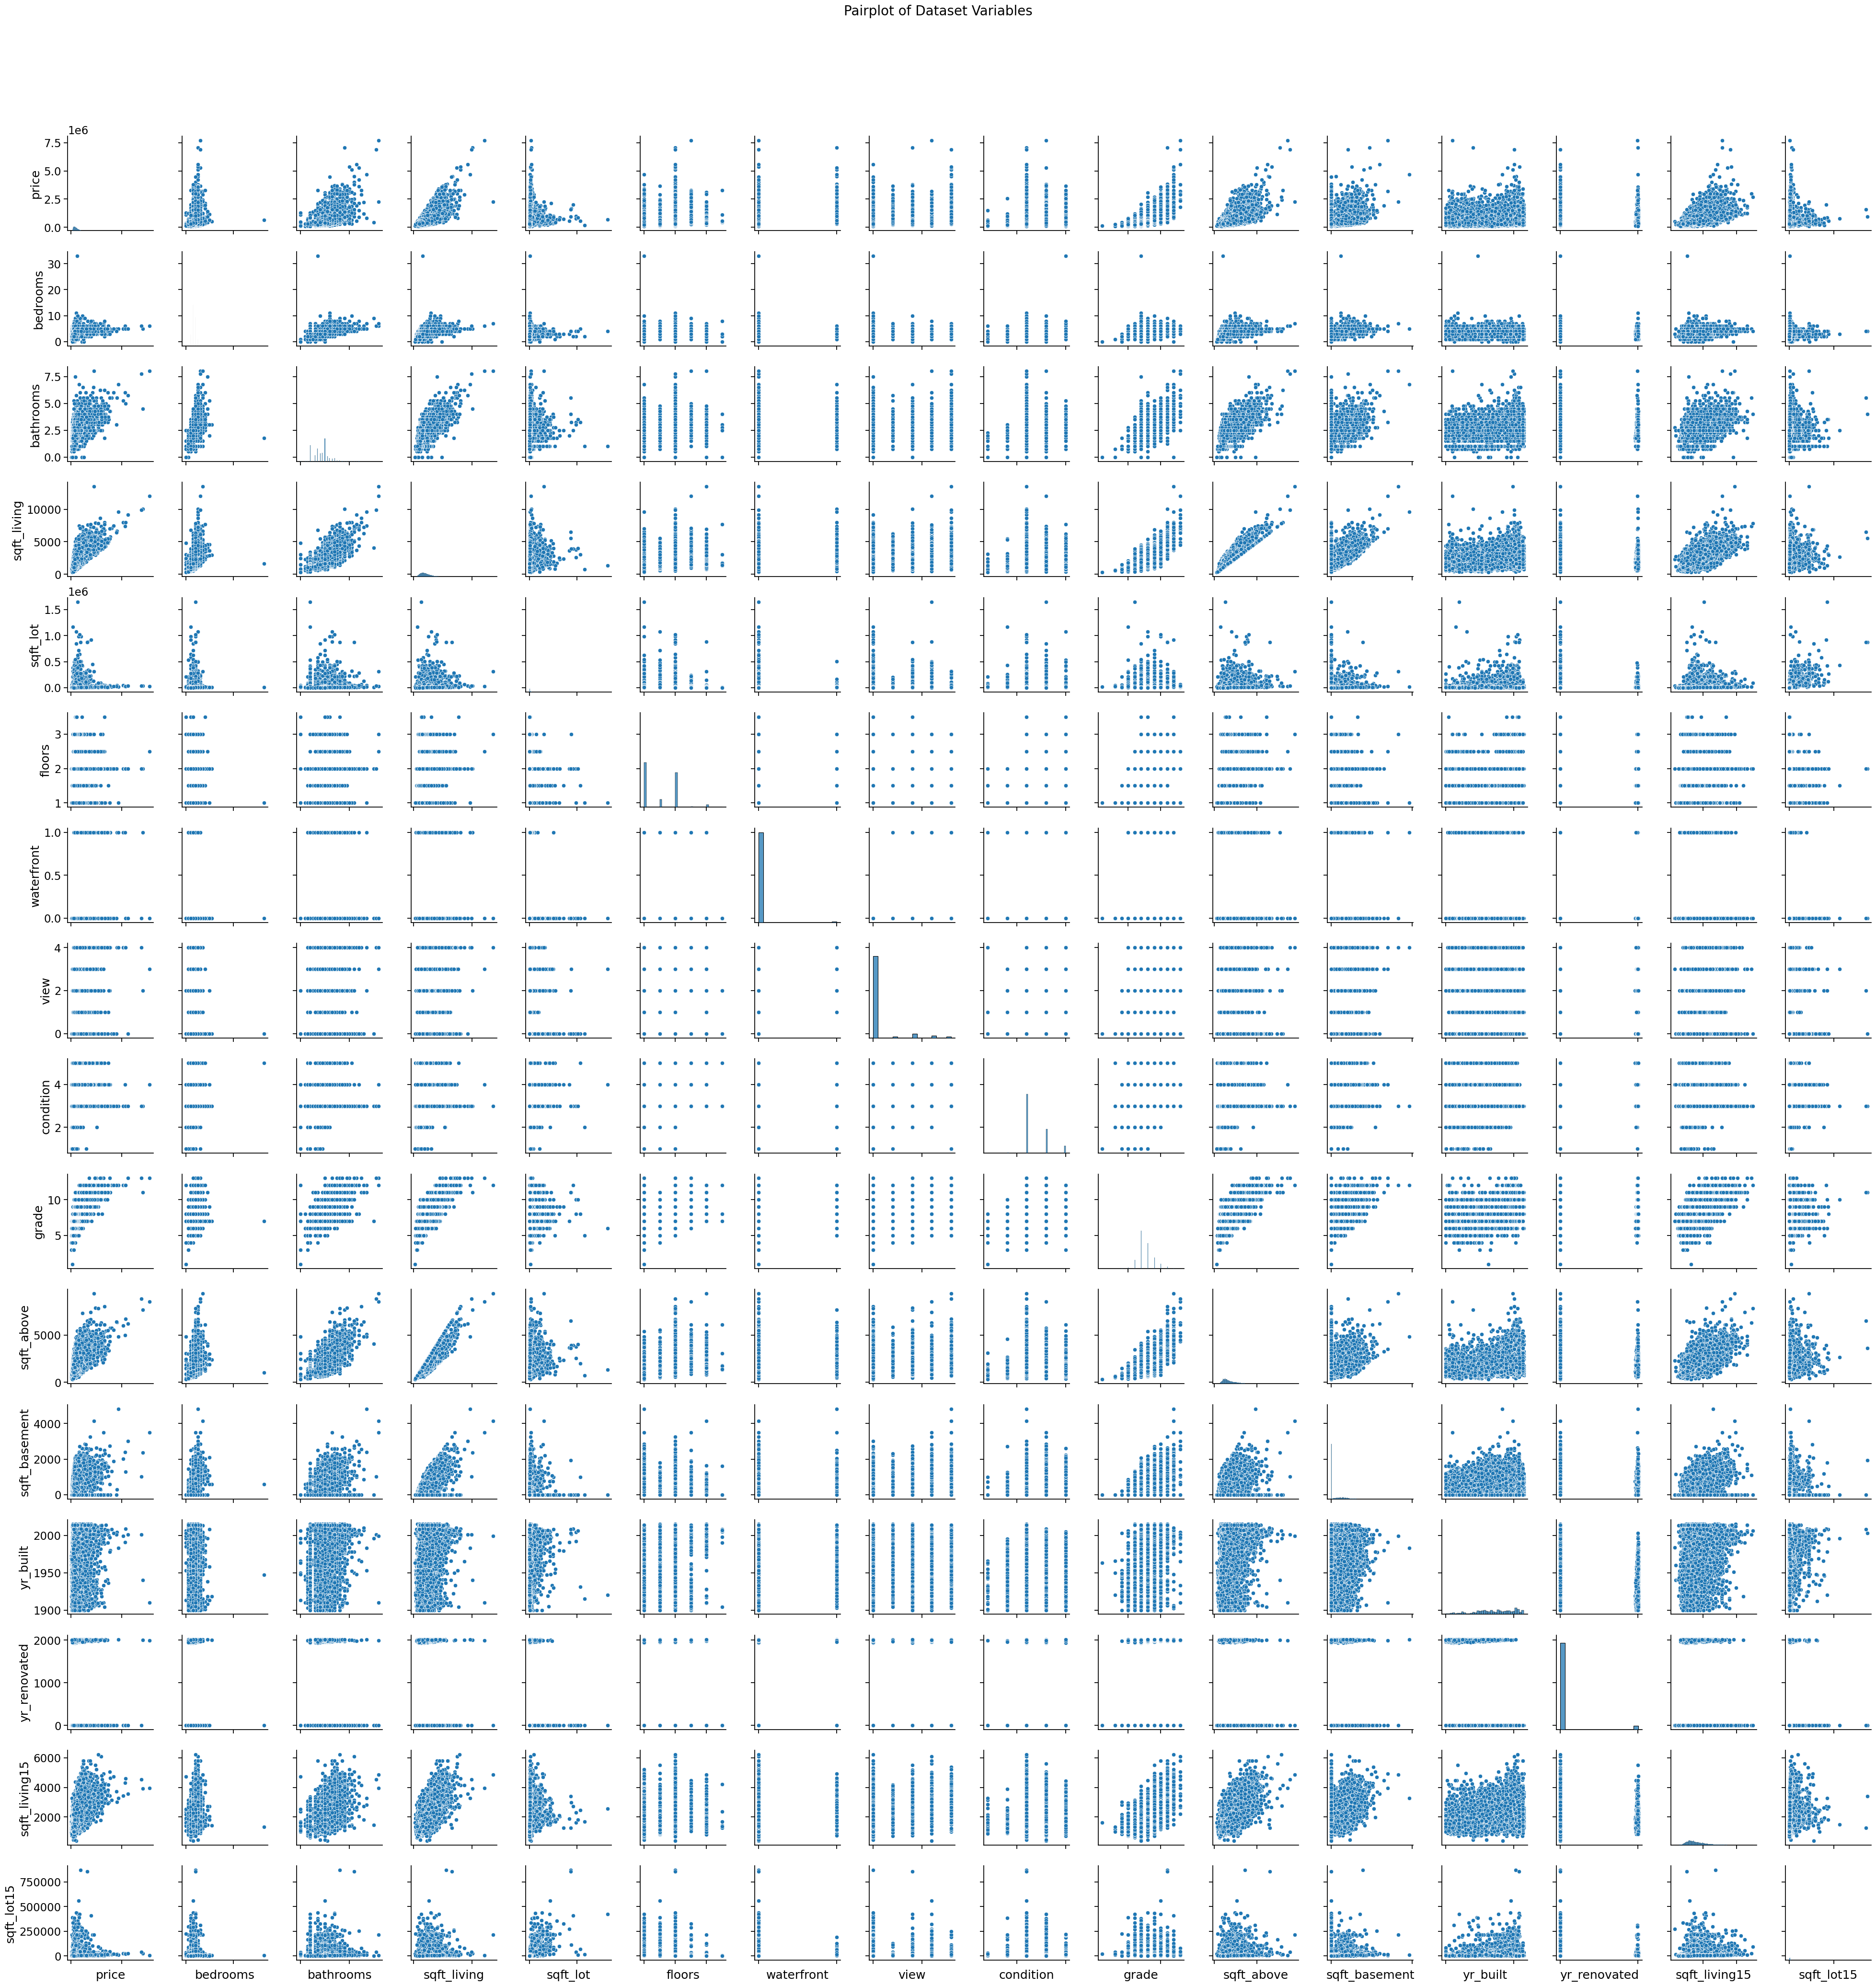

In [8]:
#Análise das Colunas em Pares
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.pairplot(data, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'])
    g.set(xticklabels=[])
    plt.suptitle('Pairplot of Dataset Variables', y=1.05, fontsize=20)
    plt.show()

A partir dos gráficos acima, serão escolhidas as variáveis que demonstram, mesmo que de forma leve, uma ascenção linear postiva em relação ao Preço de venda da casa, e são elas:

*   Bedrooms - Número de quartos;
*   Bathrooms - Número de banheiros (onde 0,5 representa um lavabo sem chuveiro);
*   Sqft_living - Área útil do imóvel;
*   Grade - Escala de qualidade geral do imóvel (1 a 13);
*   Sqft_above - Metragem quadrada da área útil acima do nível do solo;
*   Sqft_living15 - Metragem quadrada da área útil dos 15 imóveis mais próximos.

In [9]:
#Seleção das variáveis de interesse
colunas = ['bedrooms', 'bathrooms', 'grade', 'sqft_living', 'sqft_above', 'sqft_living15', 'price']
data_sel = data[colunas].dropna().copy()
data_sel.head()

,bedrooms,bathrooms,grade,sqft_living,sqft_above,sqft_living15,price
0,3,1.00,7,1180,1180,1340,221900.0
1,3,2.25,7,2570,2170,1690,538000.0
2,2,1.00,6,770,770,2720,180000.0
3,4,3.00,7,1960,1050,1360,604000.0
4,3,2.00,8,1680,1680,1800,510000.0


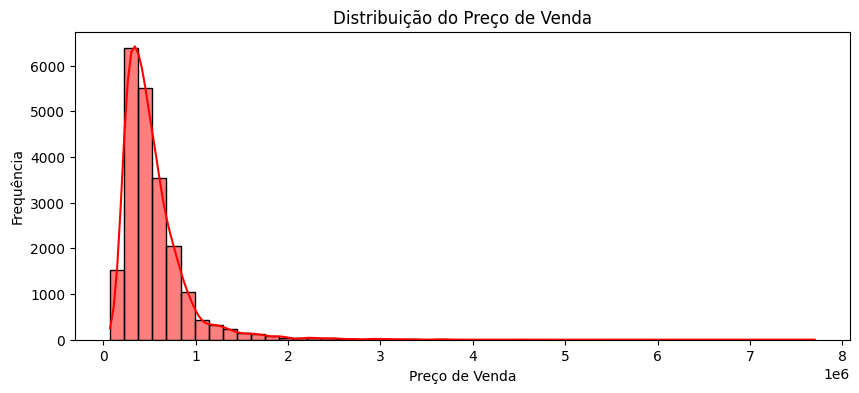

In [10]:
#Histograma de preços de venda
plt.figure(figsize=(10, 4))
sns.histplot(data['price'],bins=50,color='r',kde=True)
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

Observa-se pelo gráfico acima que há uma concentração de de imóveis nos preços de venda inferiores, tendo uma assimetria à direita pela existência de outliers. Isto mostra que a distribuição não é normal e precisaremos de alguns tratamentos ao avançar da aplicação do modelo.


> 2. Regressão Linear

Será construído um modelo de Regressão Linear para prever os preços dos imóveis.

Todas as variáveis selecionadas foram numéricas, variando entre variáveis de número inteiro e de números reais. Caso necessário, serão realizados tratamentos nos dados para transformação do tipo.

In [11]:
#Definindo as variáveis: X (variáveis independentes) e y (variável dependente)
y = data_sel['price']
X = data_sel.drop(['price'], axis=1)

#Convertendo colunas booleanas para inteiros
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

#Removendo linhas com NaN (caso exista)
data_sel = pd.concat([X, y], axis=1).dropna()
y = data_sel['price']
X = data_sel.drop('price', axis=1)

# Verificar tipos finais
print("Tipos após conversão final:")
print(X.dtypes)

# Ajustar modelo de Regressão Linear Múltipla
X = sm.add_constant(X) #adiciona constante ao modelo
model = sm.OLS(y, X).fit()
print(model.summary())

Tipos após conversão final:
bedrooms           int64
bathrooms        float64
grade              int64
sqft_living        int64
sqft_above         int64
sqft_living15      int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4415.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:38:39   Log-Likelihood:            -2.9896e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21606   BIC:                         5.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  

O resultado da regressão demonstra que a partir das variáveis selecionadas pode-se explicar 55,1% da variação no Preço de Venda (R-squared: 0.551).

Todas as variáveis selecionadas são significativas para explicar o Preço de Venda (P>|t| = 0).

Já os coeficientes demonstram o impacto médio no preço de forma direta, sendo os coeficientes positivos relativos a um aumento da variável dependente aumenta o preço (Área útil do imóvel, Qualidade do imóvel, Área útil dos 15 imoveis próximos) e os coeficientes negativos relativos a um aumento da variável dependente diminui o preço (Qtde. de   quartos, Qtde. de banheiros e Área útil acima do nível do solo).

Os coeficentes negativos podem ser advindos de multicolinearidade (resultado da condição alto: 3,30e+04) no modelo. Qtde. de quartos pode estar correlacionada com a Área útil do imóvel, por exemplo.

*  Omnibus: 16814.356 de Prob(Omnibus): 0.000. O teste Omnibus verifica a normalidade da distribuição dos resíduos. Um p-valor de 0.000 (muito baixo) indica que os resíduos não seguem uma distribuição normal. Isso é consistente com o histograma de preços que mostrou assimetria.

*  Jarque-Bera (JB): 1005508.666 e Prob(JB): 0.00. Outro teste para a normalidade dos resíduos, que também considera a assimetria e a curtose. Um p-valor de 0.00 confirma que os resíduos não são normalmente distribuídos.

*  Skew (Assimetria): 3.251. Mede a assimetria da distribuição dos resíduos. Um valor de 3.251 (positivo e distante de zero) indica uma forte assimetria positiva, ou seja, a cauda da distribuição dos resíduos é mais longa à direita. Isso significa que o modelo tende a subestimar os preços para alguns imóveis mais caros (há muitos erros positivos grandes).

*  Kurtosis (Curtose): 35.776. Mede o 'achatamento' ou 'pico' da distribuição dos resíduos. Um valor de 35.776 (muito alto em comparação com o valor 3 de uma distribuição normal) indica uma distribuição com 'caudas pesadas' e um pico muito acentuado, sugerindo a presença de muitos outliers ou erros extremos.

*  Durbin-Watson: 1.982. Testa a autocorrelação dos resíduos (se os erros consecutivos são correlacionados). Um valor próximo de 2 indica que não há autocorrelação.

Serão gerados gráficos para visuaização da correlação dos coeficientes já citada.

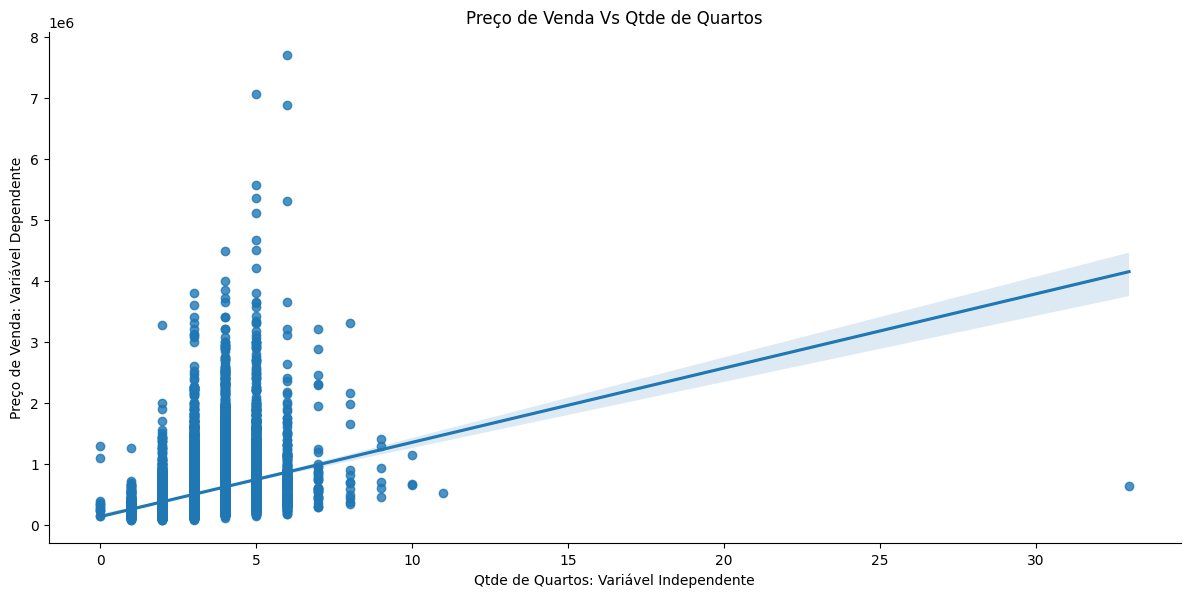

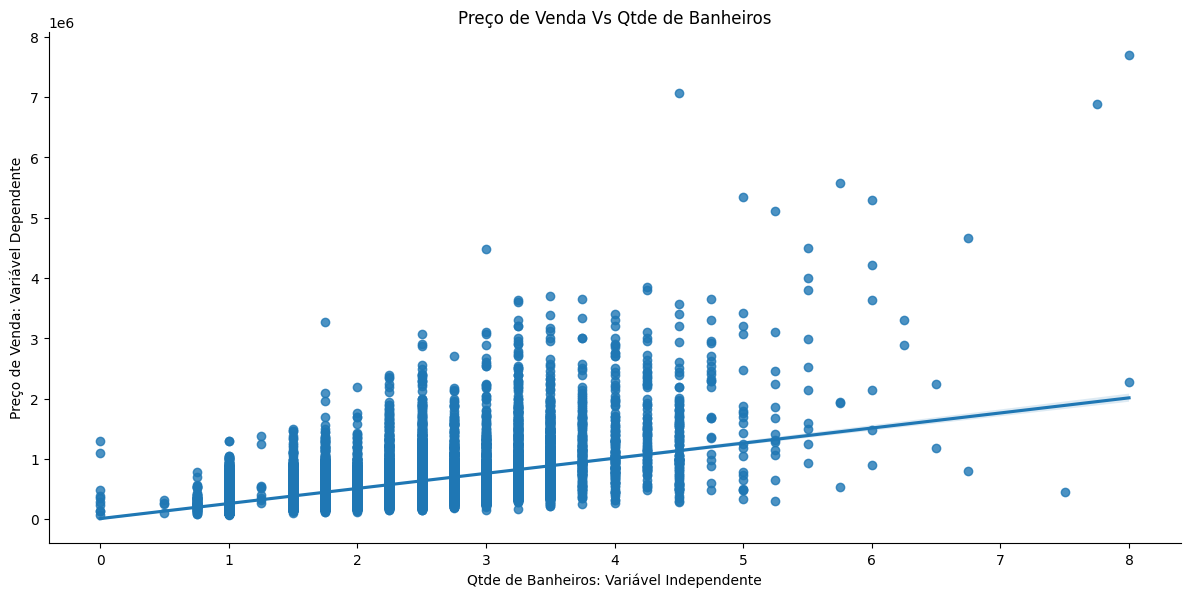

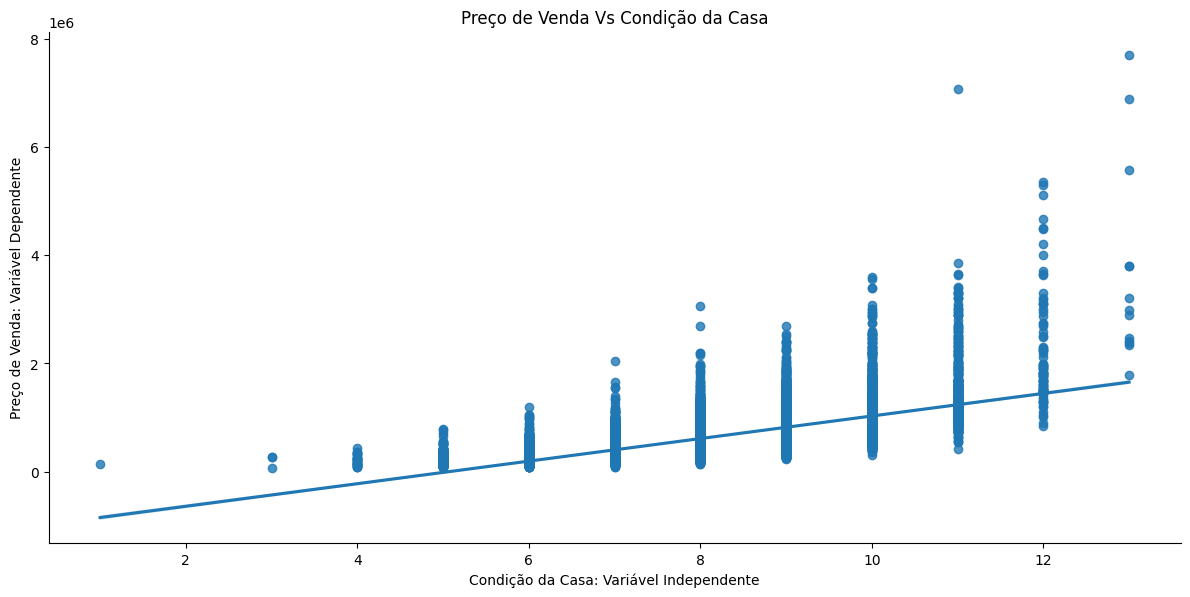

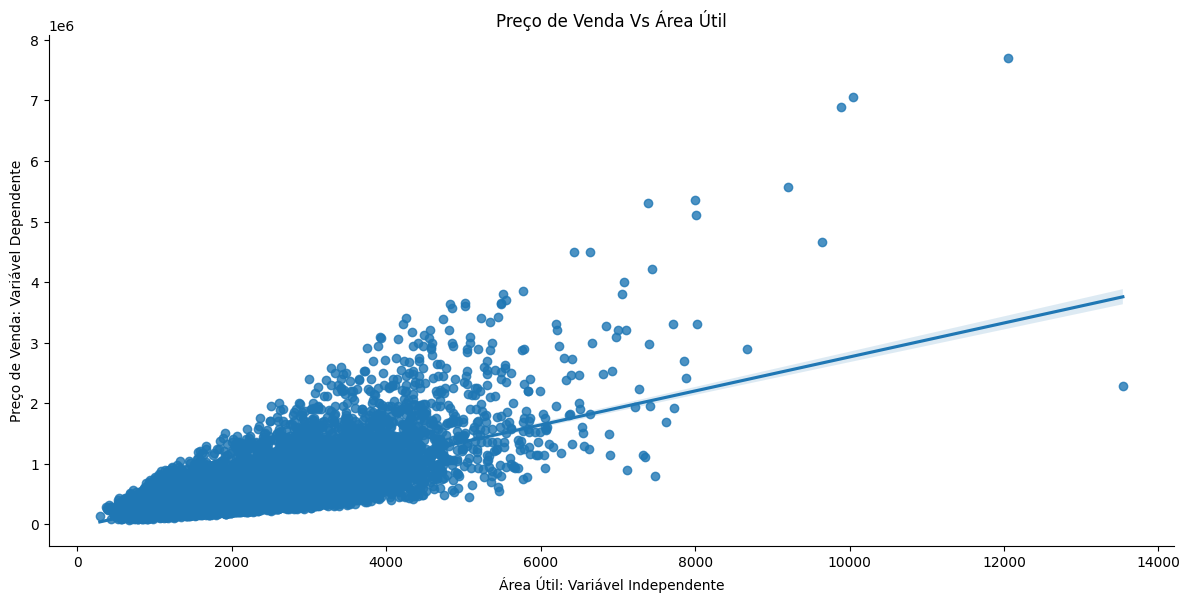

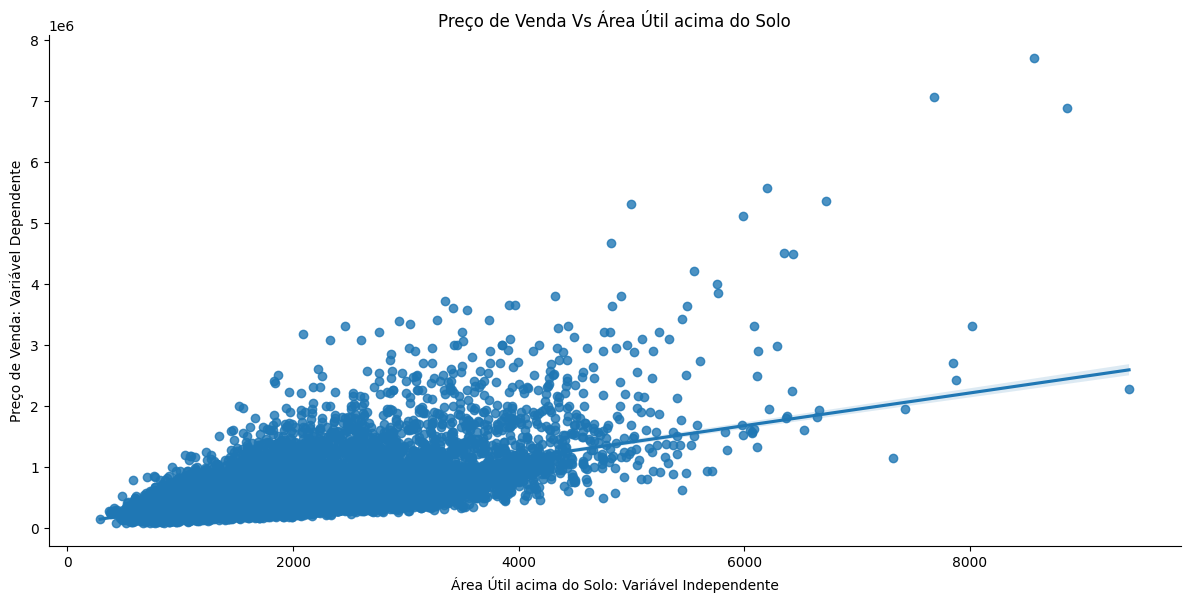

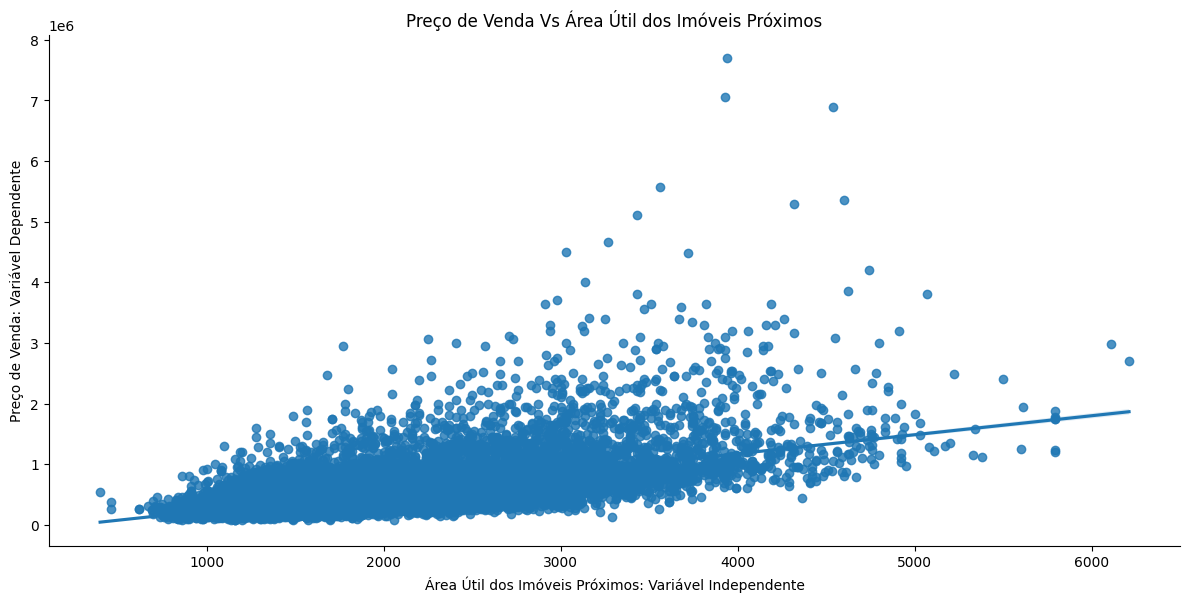

In [12]:
sns.lmplot(x='bedrooms',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Qtde de Quartos: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Qtde de Quartos')
plt.show()

sns.lmplot(x='bathrooms',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Qtde de Banheiros: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Qtde de Banheiros')
plt.show()

sns.lmplot(x='grade',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Condição da Casa: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Condição da Casa')
plt.show()

sns.lmplot(x='sqft_living',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Área Útil: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Área Útil')
plt.show()

sns.lmplot(x='sqft_above',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Área Útil acima do Solo: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Área Útil acima do Solo')
plt.show()

sns.lmplot(x='sqft_living15',y='price',data=data_sel,aspect=2,height=6)
plt.xlabel('Área Útil dos Imóveis Próximos: Variável Independente')
plt.ylabel('Preço de Venda: Variável Dependente')
plt.title('Preço de Venda Vs Área Útil dos Imóveis Próximos')
plt.show()

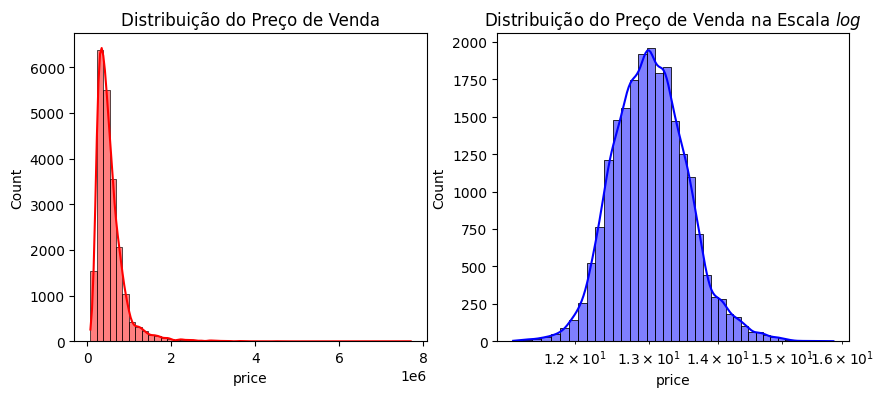

In [13]:
f= plt.figure(figsize=(10,4))

ax=f.add_subplot(121)
sns.histplot(data_sel['price'],bins=50,color='r',kde=True, ax=ax)
ax.set_title('Distribuição do Preço de Venda')

ax=f.add_subplot(122)
sns.histplot(np.log(data_sel['price']),bins=40,color='b',kde=True, ax=ax)
ax.set_title('Distribuição do Preço de Venda na Escala $log$ ')
ax.set_xscale('log')

Foi realizada a tranfromação da variável dependente do Preço de Venda para escala logarítma a fim de normalizar a distribuição, conforme visto pelo gráfico acima.

In [14]:
data_sel['log_price'] = np.log(data_sel['price'])

In [15]:
#Definindo as variáveis: X (variáveis independentes) e y (variável dependente)
y = data_sel['log_price'] # Usando a variável transformada
X = data_sel.drop(['price', 'log_price'], axis=1) # Removendo ambas as variáveis de preço de X

#Removendo linhas com NaN (caso exista)
data_sel_clean = pd.concat([X, y], axis=1).dropna() # Cria um novo DataFrame limpo
y = data_sel_clean['log_price']
X = data_sel_clean.drop('log_price', axis=1)

# Ajustar modelo de Regressão Linear Múltipla
X = sm.add_constant(X) #adiciona constante ao modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     4786.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:38:51   Log-Likelihood:                -7673.6
No. Observations:               21613   AIC:                         1.536e+04
Df Residuals:                   21606   BIC:                         1.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.1578      0.021    529.014

O modelo tem uma pequena de melhora de adequeção passando a explicar 57,1%. Outros fatores serão investigados em relação à normalidade.

In [16]:
# Calcular VIF (Variance Inflation Factor) para verificar multicolinearidade
# Excluir a constante para o cálculo do VIF, pois VIF não se aplica à constante
X_vif = X.drop('const', axis=1, errors='ignore')

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print("Variance Inflation Factor (VIF):")
print(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF):
         feature        VIF
3    sqft_living  37.688411
2          grade  32.204843
4     sqft_above  26.278688
5  sqft_living15  25.167441
1      bathrooms  21.532226
0       bedrooms  17.952594


Todos os valores da VIF deram > 5, o que significa que há multicolinearidade entre as variáveis.



In [17]:
name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  np.float64(215.79042110690935)),
 ('p-value', np.float64(8.217308987834913e-44)),
 ('f-value', np.float64(36.316011372459464)),
 ('f: p-value', np.float64(4.945963046080895e-44))]

Com o valor do p-value próximo a zero, rejeitamos a hipótese nula, ou seja, concluímos que há fortes evidências de heteroscedasticidade nos resíduos do modelo de regressão.



> 3. Ajustes no Modelo

Com as violações dos pressupostos de normalidade necessários para aplicação da regressão linear, será aplicado outro modelo à base de dados para explicar a variável dependente.









In [18]:
#Aplicação de Modelo Robusto
#Definindo as variáveis: X (variáveis independentes) e y (variável dependente)
y = data_sel['price']
X = data_sel.drop(['price', 'log_price'], axis=1)

# Ajustando o modelo OLS
lm_robusto = sm.OLS(y, X, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = lm_robusto.predict(X)
lm_robusto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.910e+04
Date:                Tue, 18 Nov 2025   Prob (F-statistic):                        0.00
Time:                        00:38:51   Log-Likelihood:                     -2.9955e+05
No. Observations:               21613   AIC:                                  5.991e+05
Df Residuals:                   21607   BIC:                                  5.992e+05
Df Model:                           6                                                  
Covariance Type:                  HC0                                                  
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -7.637e+04   5957.498    -12.820      0.000    -8.8e+04   -6.47e+04
bathrooms      -1.38e+04   4839.420     -2.852      0.004   -2.33e+04   -4315.060
grade          2.823e+04   2095.948     13.467      0.000    2.41e+04    3.23e+04
sqft_living     319.2941     12.278     26.006      0.000     295.230     343.358
sqft_above      -55.3152      7.041     -7.856      0.000     -69.116     -41.514
sqft_living15    26.1397      7.912      3.304      0.001      10.632      41.647
==============================================================================
Omnibus:                    16221.856   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           757455.899
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.307   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC0)
[3] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O resultado do modelo robusto demonstra que a partir das variáveis selecionadas pode-se explicar 85% da variação no Preço de Venda (R-squared: 0.850).

Todas as variáveis selecionadas são significativas para explicar o Preço de Venda (P>|t| igual a zero ou próximo a zero).

Os coeficientes continuaram o mesmo em questões de positivo e negativo e a condição continua alta, demonstrando multicolinearidade.

As demais análises continuam a mesma.

In [19]:
#Aplicação de Modelo Robusto com ajuste de escala das variáveis
# Definindo a variável dependente em escala log, evitando valores zero ou negativos
y = np.log(data_sel['price'] + 1)

# Aplicando log nas variáveis independentes, evitando valores zero ou negativos
X = np.log(data_sel[['bedrooms', 'bathrooms', 'grade', 'sqft_living', 'sqft_above', 'sqft_living15']].replace(0, 1))

# Ajustando o modelo OLS sem a constante e com variância robusta (HC0)
lm_robusto = sm.OLS(y, X, missing='drop').fit(cov_type='HC0')

# Fazendo previsões com o modelo ajustado
predictions = lm_robusto.predict(X)

# Exibindo o resumo do modelo
print(lm_robusto.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.931e+06
Date:                Tue, 18 Nov 2025   Prob (F-statistic):                        0.00
Time:                        00:38:51   Log-Likelihood:                         -10615.
No. Observations:               21613   AIC:                                  2.124e+04
Df Residuals:                   21607   BIC:                                  2.129e+04
Df Model:                           6                                                  
Covariance Type:                  HC0                                                  
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

O resultado do modelo robusto com ajuste de escala das variáveis demonstra que a partir das variáveis selecionadas pode-se explicar 99,9% da variação no Preço de Venda (R-squared: 0.999). Consideramos o modelo significativo, com erros robustos à heterocedasticidade e pouca multicolinearidade.

Todas as variáveis selecionadas são significativas para explicar o Preço de Venda (P>|t| = 0).

Os coeficientes continuaram o mesmo em questões de positivo e negativo e a condição diminui para 149, demonstrando melhora substancial na multicolinearidade. As transformações logarítmicas nas variáveis independentes ajudaram a reduzir a correlação entre elas, porém não eliminou.

Os p-valores ainda indicam que os resíduos não são perfeitamente normais, mas os valores de Skew e Kurtosis estão muito próximos do ideal (0 e 3). Isso sugere uma distribuição de resíduos muito melhor do que no modelo original, indicando que as transformações logarítmicas ajudaram a mitigar a não-normalidade.

Durbin-Watson continua muito próximo de 2, indicando que não há problemas de autocorrelação serial nos resíduos.



> 4. Resultados e Conclusão

A partir dos resultados do último modelo aplicado, podemos dizer que:
*  Um aumento de 10% na área útil está associado a um aumento de ≈ 10% no preço, mantendo as demais variáveis fixas.
Mostra que metragem interna é uma das principais variáveis que aumentam o preço.
*  Um aumento de 10% na área média das casas vizinhas está associado a ≈ 6% de aumento no preço.
Indica forte efeito de vizinhança: imóveis em áreas com casas maiores tendem a ser mais valorizados.
*  Melhorar a qualidade construtiva tem impacto muito relevante no preço ≈ 14% (a mais relevante), proporcionalmente, do que mexer em algumas dimensões físicas.
*  Analisando a quantidade de quartos e igualmente a quantidade de banheiros, para o mesmo nível de área, qualidade e vizinhança, aumentar o número de cômodos tende a distribuir a metragem em mais peças menores, o que pode ser percebido como perda de conforto (quartos pequenos, banheiros apertados etc.).

Os resultados indicam que aumentar a área útil e melhorar o grau de qualidade do imóvel tem impacto proporcionalmente maior no preço do que as demais variáveis analisadas. Assim, um investidor pode decidir priorizar reformas que ampliem a área interna e elevem o padrão de acabamento (por exemplo, modernização de cozinha e banheiros), em vez de dividir cômodos existentes para criar mais quartos ou banheiros.
Também deve observar a vizinhança que o imóvel se encontra, vizinhança com imóveis no padrão de área útil maiores, serão melhores avaliados no momentos da venda.


# Referências Bibliográficas

Base de dados disponível em: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data Acesso em 14/11/2025.

Bibliotecas do Python no Google Colab.

Material da disciplina de AEDI disponibilizado no Aprender3.

In [21]:
from google.colab import drive

!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Prova_Final_Q1_Mariana Mello Pereira.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Prova_Final_Q1_Mariana Mello Pereira.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1144280 bytes to /content/drive/MyDrive/Colab Notebooks/Prova_Final_Q1_Mariana Mello Pereira.html
